In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import seaborn as sns

# Load dataset
df = pd.read_csv('DS1_C5_S5_Hotel Dataset.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,City Hotel,0,15,2017,August,34,25,2,2,2,...,No Deposit,14.0,NaN,0,Transient,132.53,0,2,Check-Out,29-08-2017
2093,City Hotel,0,83,2017,August,35,28,1,3,1,...,No Deposit,14.0,NaN,0,Transient,147.68,0,0,Check-Out,01-09-2017
2094,City Hotel,0,189,2017,August,35,29,0,3,2,...,No Deposit,42.0,NaN,0,Transient,80.10,0,1,Check-Out,01-09-2017
2095,City Hotel,0,147,2017,August,35,28,1,5,2,...,No Deposit,14.0,NaN,0,Transient,117.00,0,1,Check-Out,03-09-2017


# TASK 1:Customer Satisfaction

In [2]:
#1.What is the distribution of the number and types of special requests made by guests.

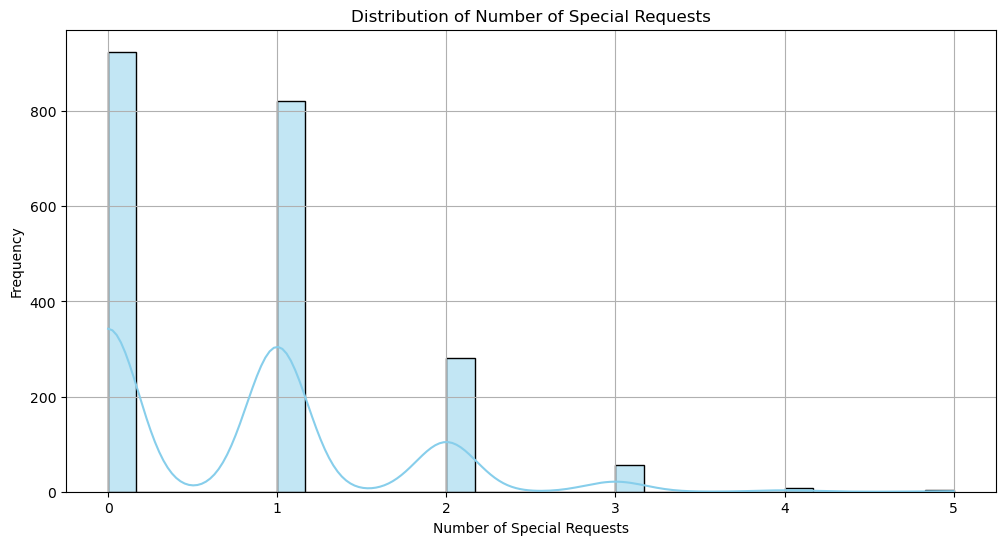

In [3]:
# Clean and preprocess data
df['total_of_special_requests'] = pd.to_numeric(df['total_of_special_requests'], errors='coerce')

# Drop rows with missing values in key columns
df_clean = df.dropna(subset=['total_of_special_requests'])

# Plot the distribution of the number of special requests
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['total_of_special_requests'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

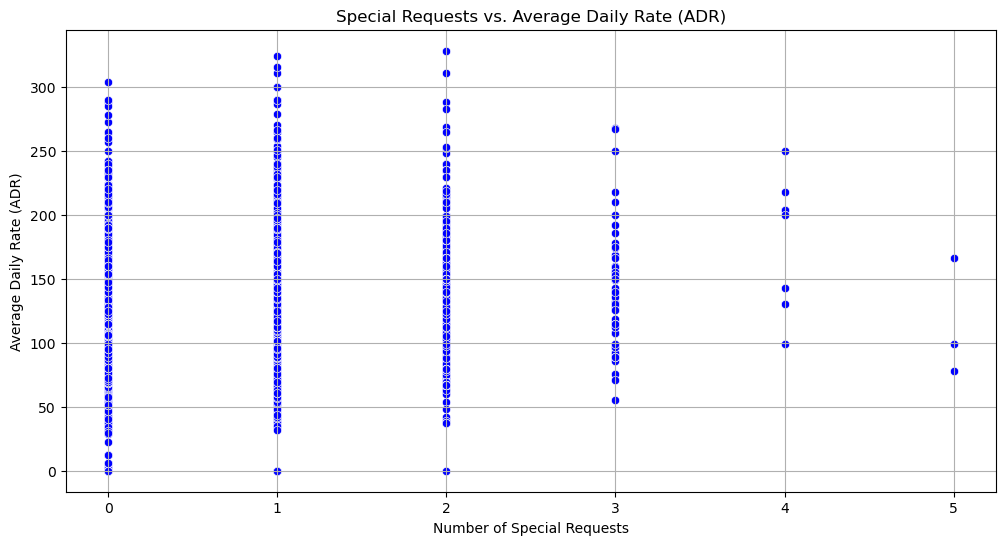

Pearson Correlation: 0.11470414743768984


In [4]:
from scipy.stats import pearsonr

# Clean and preprocess data
df['total_of_special_requests'] = pd.to_numeric(df['total_of_special_requests'], errors='coerce')
df['adr'] = pd.to_numeric(df['adr'], errors='coerce')

# Drop rows with missing values in key columns
df_clean = df.dropna(subset=['total_of_special_requests', 'adr'])

# Scatter plot of special requests vs. ADR
plt.figure(figsize=(12, 6))
sns.scatterplot(x='total_of_special_requests', y='adr', data=df_clean, color='blue')
plt.title('Special Requests vs. Average Daily Rate (ADR)')
plt.xlabel('Number of Special Requests')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(True)
plt.show()

# Compute Pearson correlation
correlation, _ = pearsonr(df_clean['total_of_special_requests'], df_clean['adr'])
print(f'Pearson Correlation: {correlation}')




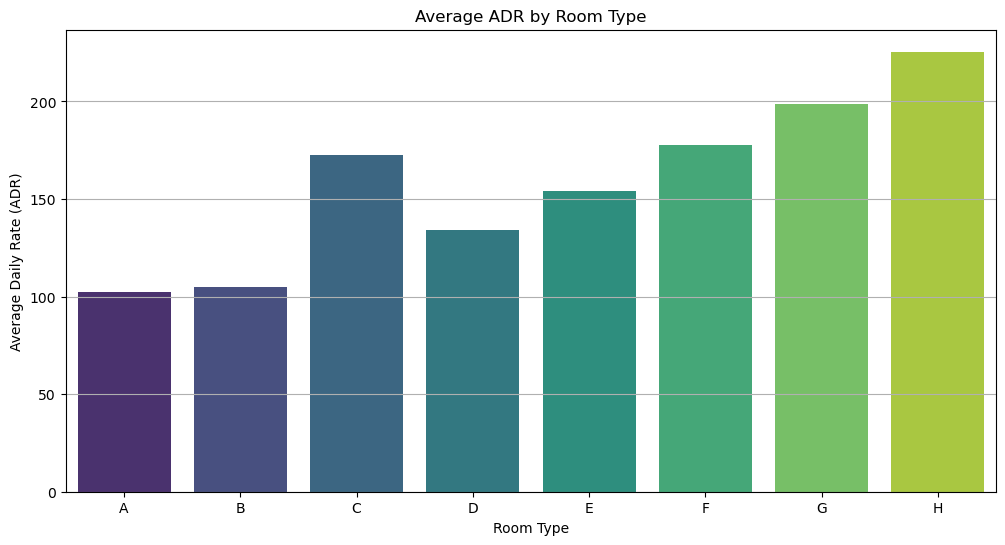

In [5]:
# Average ADR by room type
avg_adr_by_room_type = df_clean.groupby('reserved_room_type')['adr'].mean().reset_index()
avg_adr_by_room_type.columns = ['Room Type', 'Average ADR']

# Bar chart for ADR by room type
plt.figure(figsize=(12, 6))
sns.barplot(x='Room Type', y='Average ADR', data=avg_adr_by_room_type, palette='viridis')
plt.title('Average ADR by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(axis='y')
plt.show()

# TASK 2: Marketing and Sales Optimization

In [6]:
#Which  marketing channels and market segments contribute the most to successful bookings? 

  distribution_channel  Number of Successful Bookings
0                TA/TO                           1244
1               Direct                            308
2            Corporate                             35
3                  GDS                              9


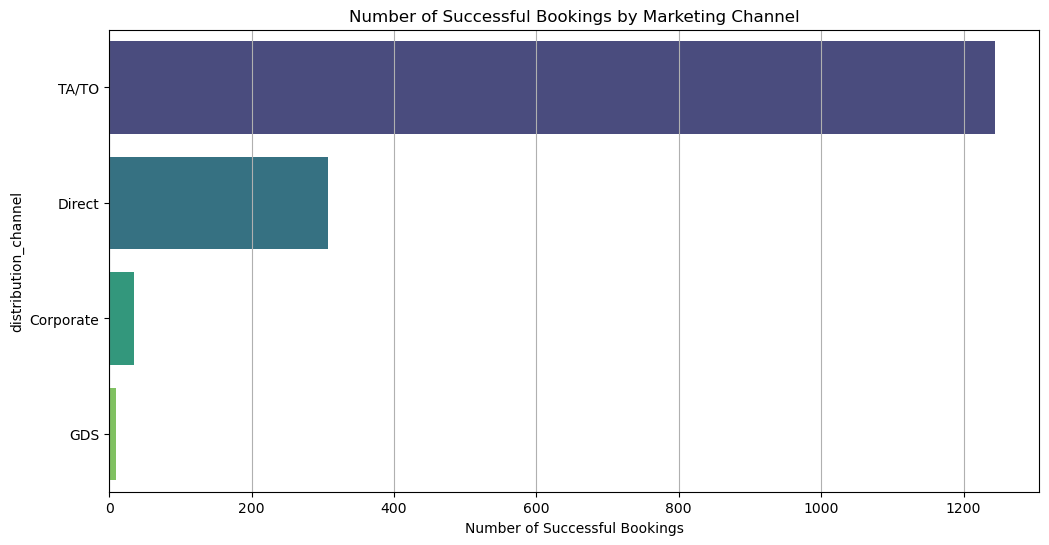

In [7]:
# Filter for successful bookings (not canceled)
successful_bookings = df[df['is_canceled'] == 0]

# Aggregate data by marketing channel
channel_success = successful_bookings['distribution_channel'].value_counts().reset_index()
channel_success.columns = ['distribution_channel', 'Number of Successful Bookings']

# Verify the structure of the DataFrame
print(channel_success.head())

# Plot the number of successful bookings by marketing channel
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Successful Bookings', y='distribution_channel', data=channel_success, palette='viridis')
plt.title('Number of Successful Bookings by Marketing Channel')
plt.xlabel('Number of Successful Bookings')
plt.ylabel('distribution_channel')
plt.grid(axis='x')
plt.show()

  Market Segment  Number of Successful Bookings
0      Online TA                            983
1         Direct                            309
2  Offline TA/TO                            141
3         Groups                            132
4      Corporate                             29


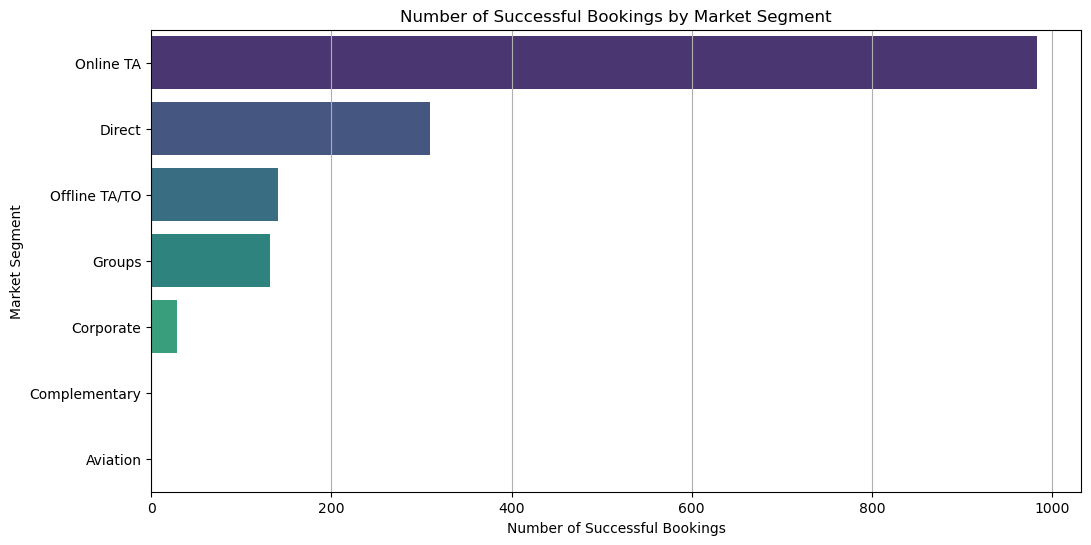

In [8]:
# Aggregate data by market segment
segment_success = successful_bookings['market_segment'].value_counts().reset_index()
segment_success.columns = ['Market Segment', 'Number of Successful Bookings']

# Verify the structure of the DataFrame
print(segment_success.head())

# Plot the number of successful bookings by market segment
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Successful Bookings', y='Market Segment', data=segment_success, palette='viridis')
plt.title('Number of Successful Bookings by Market Segment')
plt.xlabel('Number of Successful Bookings')
plt.ylabel('Market Segment')
plt.grid(axis='x')
plt.show()

In [9]:
#Which amenities or services have the highest impact on the average daily rate(ADR).

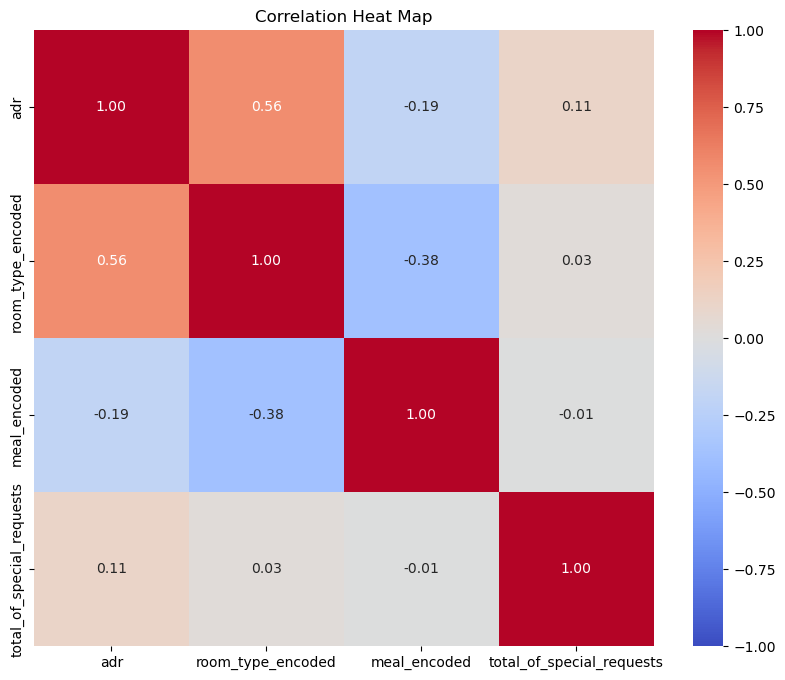

In [12]:
# Example encoding process (if not already done)
# Encoding categorical features
df_clean['room_type_encoded'] = df_clean['reserved_room_type'].astype('category').cat.codes
df_clean['meal_encoded'] = df_clean['meal'].astype('category').cat.codes

# Calculate correlation matrix
correlation_matrix = df_clean[['adr', 'room_type_encoded', 'meal_encoded', 'total_of_special_requests']].corr()

# Plot the correlation heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heat Map')
plt.show()


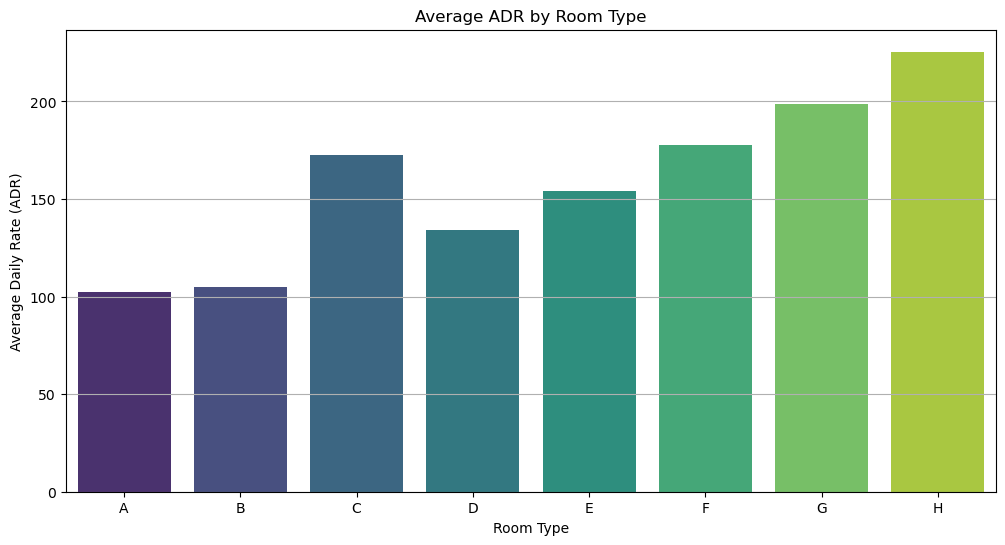

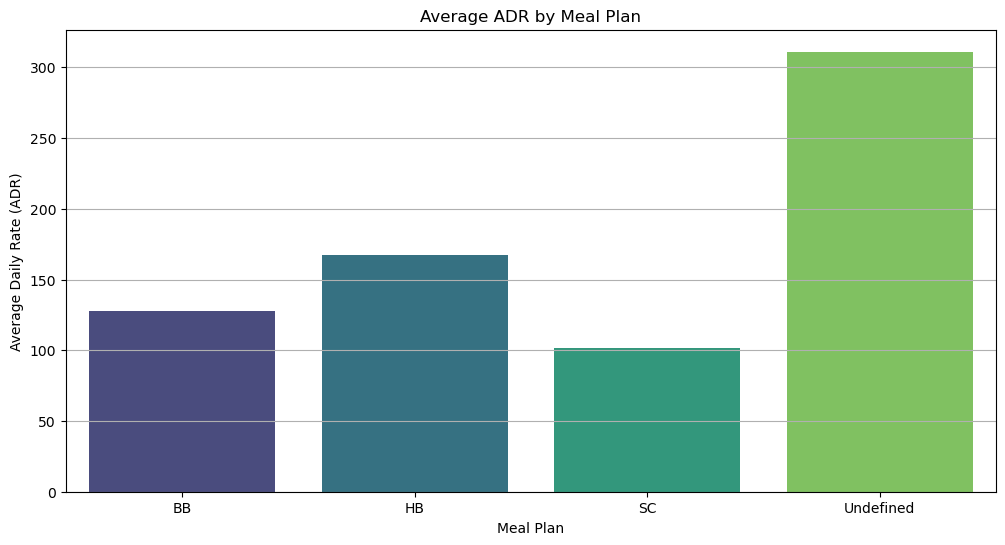

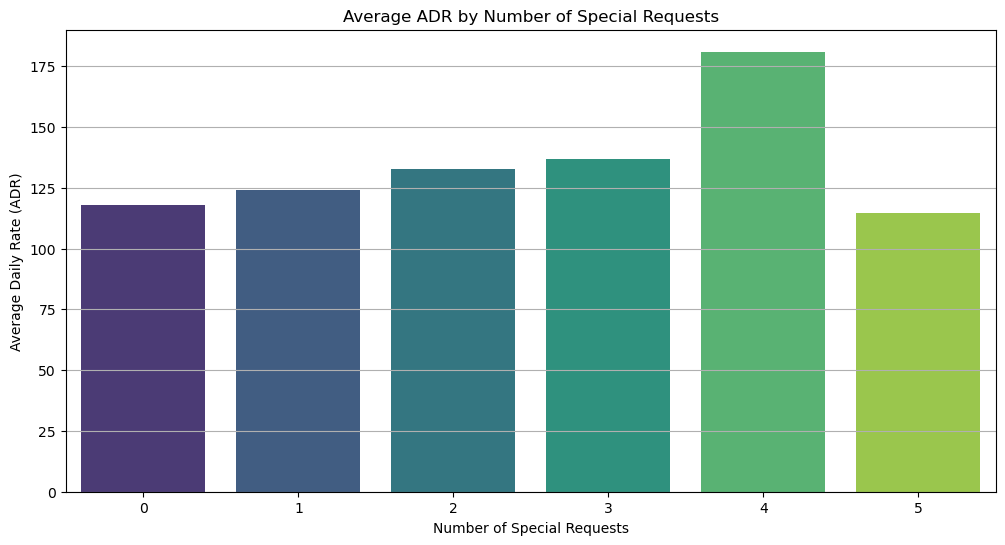

In [13]:
# Average ADR by room type
avg_adr_by_room_type = df_clean.groupby('reserved_room_type')['adr'].mean().reset_index()
avg_adr_by_room_type.columns = ['Room Type', 'Average ADR']

# Bar chart for ADR by room type
plt.figure(figsize=(12, 6))
sns.barplot(x='Room Type', y='Average ADR', data=avg_adr_by_room_type, palette='viridis')
plt.title('Average ADR by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(axis='y')
plt.show()

# Average ADR by meal plan
avg_adr_by_meal = df_clean.groupby('meal')['adr'].mean().reset_index()
avg_adr_by_meal.columns = ['Meal Plan', 'Average ADR']

# Bar chart for ADR by meal plan
plt.figure(figsize=(12, 6))
sns.barplot(x='Meal Plan', y='Average ADR', data=avg_adr_by_meal, palette='viridis')
plt.title('Average ADR by Meal Plan')
plt.xlabel('Meal Plan')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(axis='y')
plt.show()

# Average ADR by number of special requests
avg_adr_by_special_requests = df_clean.groupby('total_of_special_requests')['adr'].mean().reset_index()
avg_adr_by_special_requests.columns = ['Special Requests', 'Average ADR']

# Bar chart for ADR by special requests
plt.figure(figsize=(12, 6))
sns.barplot(x='Special Requests', y='Average ADR', data=avg_adr_by_special_requests, palette='viridis')
plt.title('Average ADR by Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(axis='y')
plt.show()


In [14]:
#What is the distribution of bookings across various distribution channels.

In [15]:
# Count bookings by distribution channel
channel_distribution = df['distribution_channel'].value_counts().reset_index()
channel_distribution.columns = ['Distribution Channel', 'Number of Bookings']

# Display the aggregated data
print(channel_distribution)


  Distribution Channel  Number of Bookings
0                TA/TO                1689
1               Direct                 351
2            Corporate                  35
3                  GDS                  22


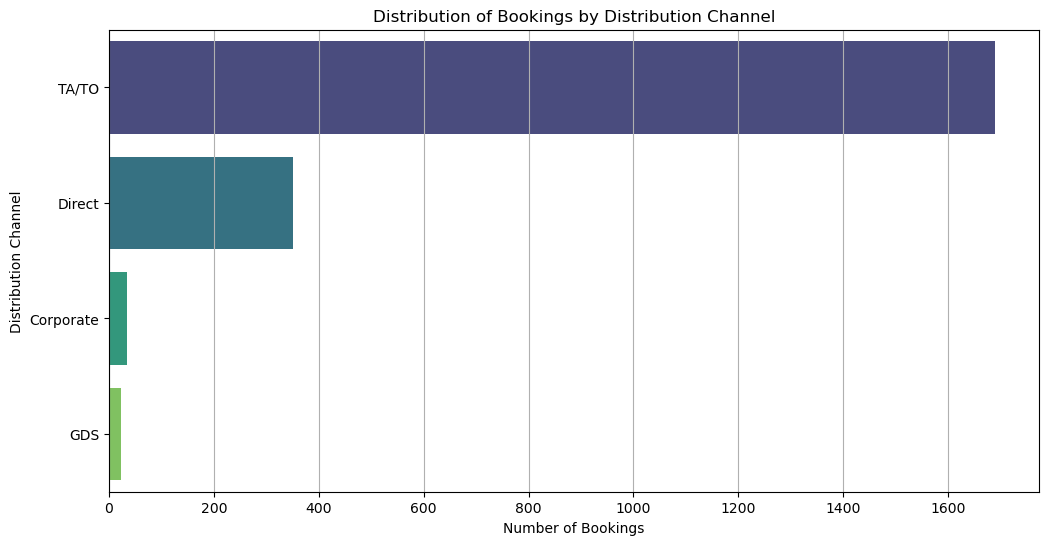

In [16]:
# Plot the number of bookings by distribution channel
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Bookings', y='Distribution Channel', data=channel_distribution, palette='viridis')
plt.title('Distribution of Bookings by Distribution Channel')
plt.xlabel('Number of Bookings')
plt.ylabel('Distribution Channel')
plt.grid(axis='x')
plt.show()
